In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
trueQa = np.random.randn(10,1)
print(trueQa)

[[ 0.37218182]
 [-1.13625478]
 [-1.20318389]
 [ 0.82393655]
 [ 0.42881884]
 [-1.57870048]
 [-0.19468226]
 [ 3.96683717]
 [-0.51853812]
 [-1.27021732]]


In [3]:
np.argmax(trueQa)

7

In [4]:
def nArmBandit(qa,ep,T=10000):
    allq = 5*np.ones((10,1))
    alln = np.zeros((10,1))
    sumr = 0
    pltavgr = [0]
    for i in range(1,T):
        greedy = (np.random.rand(1)<=1-ep)
        if greedy:
            if sum(allq==np.max(allq))>1:
                a = np.random.choice(np.where(allq==np.max(allq))[0])
            else:
                a = np.argmax(allq)
        else:
            a = np.random.choice(10)
        alln[a] += 1
        r = trueQa[a]+np.random.randn(1)
        allq[a] += r/alln[a]
        sumr += r
        pltavgr.append(sumr/i)
    return pltavgr,allq

In [5]:
sample1,qa1 = nArmBandit(trueQa,0)
sample2,qa2 = nArmBandit(trueQa,0.01)
sample3,qa3 = nArmBandit(trueQa,0.1)

Text(0, 0.5, 'average rewards')

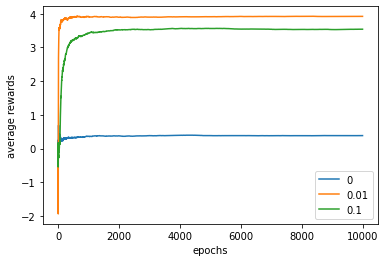

In [6]:
plt.plot(sample1)
plt.plot(sample2)
plt.plot(sample3)
plt.legend(['0','0.01','0.1'])
plt.xlabel('epochs')
plt.ylabel('average rewards')

In [7]:
print(np.argmax(qa1),np.argmax(qa2),np.argmax(qa3))

0 7 7
